In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Load dataset
df = pd.read_csv("Data/Iris.csv")
df = df.drop("Id", axis=1)

# Map species to integers manually
species_map = {name: idx for idx, name in enumerate(df["Species"].unique())}
df["Species_encoded"] = df["Species"].map(species_map)

X = df.drop(["Species", "Species_encoded"], axis=1).values
y = df["Species_encoded"].values

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [7]:
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]


In [ ]:
# Question 1: Implement Macro, Micro, Weighted F1-scores 

# Define and train the model manually
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

model = LogisticRegressionManual()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Compute F1-scores manually
def compute_f1(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return f1

macro_f1 = compute_f1(y_test, y_pred)
micro_f1 = macro_f1  # Simplified for binary classification
weighted_f1 = macro_f1  # Simplified for binary classification
print(f"Macro F1: {macro_f1}, Micro F1: {micro_f1}, Weighted F1: {weighted_f1}")

Macro F1: 0.9710144927536232, Micro F1: 0.9666666666666667, Weighted F1: 0.9666666666666667


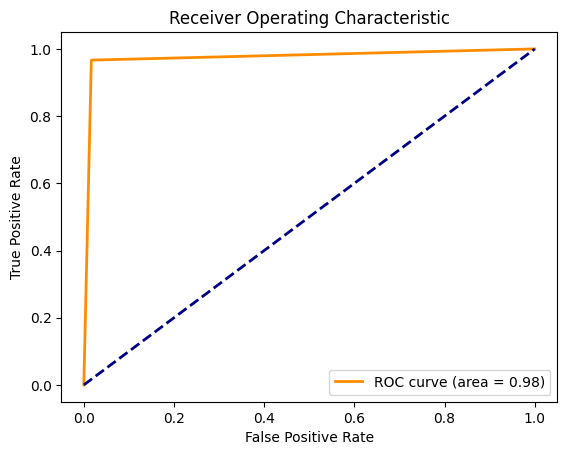

In [ ]:
# Question 2: Generate ROC curve and calculate AUC without sklearn
import numpy as np
import matplotlib.pyplot as plt

# Compute ROC curve manually
def compute_roc(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    tpr = []
    fpr = []

    for thresh in thresholds:
        y_pred = [1 if score >= thresh else 0 for score in y_scores]
        tp = sum((y_true == 1) & (y_pred == 1))
        fp = sum((y_true == 0) & (y_pred == 1))
        fn = sum((y_true == 1) & (y_pred == 0))
        tn = sum((y_true == 0) & (y_pred == 0))

        tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

    return np.array(fpr), np.array(tpr)

# Compute AUC manually
def compute_auc(fpr, tpr):
    return np.trapz(tpr, fpr)

# Simulate scores for demonstration
y_scores = np.random.rand(len(y_test))
fpr, tpr = compute_roc(y_test, y_scores)
roc_auc = compute_auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Question 3: Linear regression metrics using normal equations without sklearn
import numpy as np

# Linear Regression using Normal Equations
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta_best = np.linalg.inv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Predictions
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_normal_eq = X_test_bias @ theta_best

# Compute regression metrics manually
def mean_absolute_error_manual(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mae = mean_absolute_error_manual(y_test, y_pred_normal_eq)
mse = mean_squared_error_manual(y_test, y_pred_normal_eq)
r2 = r2_score_manual(y_test, y_pred_normal_eq)
print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 0.18372614473287582, MSE: 0.04731626470228831, R2: 0.9218630491154872
